In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df = pd.read_csv (r'/content/drive/MyDrive/office dataset for tesing/all_data_32.csv')
print (df)

        Unnamed: 0 device_id   timestamp            date_time   x        x_g  \
0                0     S1006  1644447600  10/02/2022-05:00:00 -57  -8.737031   
1                1     S1006  1644447601  10/02/2022-05:00:00 -59  -9.043594   
2                2     S1006  1644447601  10/02/2022-05:00:01 -57  -8.737031   
3                3     S1006  1644447602  10/02/2022-05:00:01 -56  -8.583750   
4                4     S1006  1644447602  10/02/2022-05:00:02 -57  -8.737031   
...            ...       ...         ...                  ...  ..        ...   
831357      831357     S1006  1646128798  01/03/2022-15:59:57 -55  -8.430469   
831358      831358     S1006  1646128798  01/03/2022-15:59:58 -58  -8.890313   
831359      831359     S1006  1646128799  01/03/2022-15:59:58 -76 -11.649375   
831360      831360     S1006  1646128799  01/03/2022-15:59:59 -59  -9.043594   
831361      831361     S1006  1646128800  01/03/2022-15:59:59 -64  -9.810000   

         y       y_g   z       z_g  rum

In [101]:
df.drop(['device_id','timestamp','date_time','x_g','y_g','z_g'], axis = 1, inplace = True)

In [102]:
df = df.iloc[: , 1:]

In [103]:
print(df)

         x   y   z  rumination
0      -57 -14 -15           1
1      -59 -14 -16           1
2      -57 -14 -14           1
3      -56 -12 -14           1
4      -57 -14 -14           1
...     ..  ..  ..         ...
831357 -55  -1  -1           0
831358 -58  -9  -3           0
831359 -76 -18   1           0
831360 -59  -8  -8           0
831361 -64 -10  -3           0

[831362 rows x 4 columns]


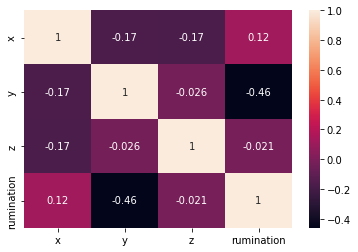

In [104]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [105]:
count0 = (df['rumination'] == 0).sum()
count1 = (df['rumination'] == 1).sum()

In [106]:
print('rumination percentage =',count1/(count0+count1)*100,'%')

rumination percentage = 34.65217318087668 %


In [107]:
X= df.iloc[: , 0:3]
y = df['rumination']
print(X)
print(y)

         x   y   z
0      -57 -14 -15
1      -59 -14 -16
2      -57 -14 -14
3      -56 -12 -14
4      -57 -14 -14
...     ..  ..  ..
831357 -55  -1  -1
831358 -58  -9  -3
831359 -76 -18   1
831360 -59  -8  -8
831361 -64 -10  -3

[831362 rows x 3 columns]
0         1
1         1
2         1
3         1
4         1
         ..
831357    0
831358    0
831359    0
831360    0
831361    0
Name: rumination, Length: 831362, dtype: int64


# Preprocessing the data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
X_train

array([[ 0.37938524, -0.78327604, -0.64857085],
       [ 0.0394179 , -0.83886827,  1.01202155],
       [ 0.0394179 , -0.7276838 ,  1.10970346],
       ...,
       [ 1.90923826, -1.8395285 ,  0.62129393],
       [ 1.05931991, -1.22801392, -0.06247941],
       [ 0.20940157,  0.60652984, -0.55088895]])

In [112]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [113]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [114]:
model.fit(X_train, y_train.to_numpy(), batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
3326/3326 [==============================] - 13s 4ms/step - loss: 0.5023 - accuracy: 0.7237
Epoch 2/5
3326/3326 [==============================] - 12s 4ms/step - loss: 0.4941 - accuracy: 0.7303
Epoch 3/5
3326/3326 [==============================] - 12s 4ms/step - loss: 0.4931 - accuracy: 0.7305
Epoch 4/5
3326/3326 [==============================] - 12s 4ms/step - loss: 0.4927 - accuracy: 0.7307
Epoch 5/5
3326/3326 [==============================] - 12s 4ms/step - loss: 0.4924 - accuracy: 0.7308


In [115]:
y_pred = model.predict(X_test<0.5).astype("int32")

In [ ]:
model.evaluate(X_test, y_test.to_numpy())

2980/5197 [================>.............] - ETA: 6s - loss: 0.4923 - accuracy: 0.7302

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')


## **Classification report for precision, recall f1-score and accuracy**

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred,labels=[1,0])
print('Classification report : \n',matrix)